# Forecasting Daily Climate of Delhi on Basis of last five years

## Import

### Import libraries

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
import plotly.express as px

### Import Dataset

In [10]:
df = pd.read_csv('C:\\Users\\Faizan\\OneDrive\\Desktop\\Faizan Folder\\Excel Data\\Time Series Dataset\\DailyDelhiClimateTrain.csv', index_col='date', parse_dates=True)
#df = pd.read_csv('C:\\Users\\Faizan\\OneDrive\\Desktop\\Faizan Folder\\Excel Data\\Time Series Dataset\\DailyDelhiClimateTrain.csv')
df.head()

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000


## Exploratory Data Analysis (EDA)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1462 entries, 2013-01-01 to 2017-01-01
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   meantemp      1462 non-null   float64
 1   humidity      1462 non-null   float64
 2   wind_speed    1462 non-null   float64
 3   meanpressure  1462 non-null   float64
dtypes: float64(4)
memory usage: 57.1 KB


In [12]:
df.describe()

,meantemp,humidity,wind_speed,meanpressure
count,1462.000000,1462.000000,1462.000000,1462.000000
mean,25.495521,60.771702,6.802209,1011.104548
std,7.348103,16.769652,4.561602,180.231668
min,6.000000,13.428571,0.000000,-3.041667
25%,18.857143,50.375000,3.475000,1001.580357
50%,27.714286,62.625000,6.221667,1008.563492
75%,31.305804,72.218750,9.238235,1014.944901
max,38.714286,100.000000,42.220000,7679.333333


<Axes: xlabel='date', ylabel='meantemp'>

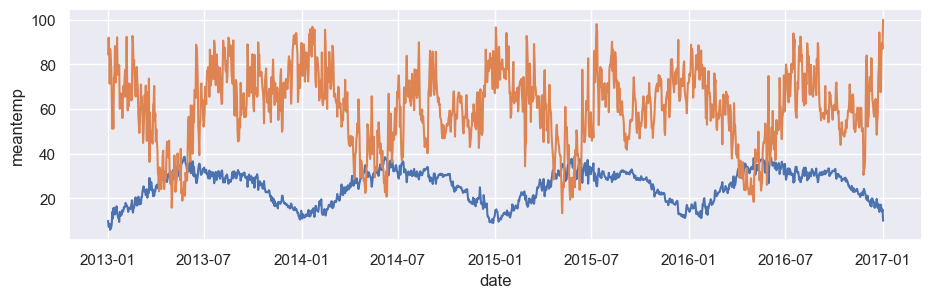

In [13]:
sns.set(rc={'figure.figsize': (11, 3)}, font_scale=1, style='darkgrid')
sns.lineplot(data=df, x='date', y='meantemp')
sns.lineplot(data=df, x='date', y='humidity')


In [14]:
fig = px.line(df, x=df.index, y='meantemp', title = 'Meant Temprature')
fig.show()

In [15]:
fig = px.line(df, title='Distribution and Composition of Whole Datasets')
fig.show()

In [16]:
fig = px.scatter(df, x='humidity', y='meantemp', title = 'Meant Temprature vs Humidity',
                 trendline='ols', trendline_color_override='green')
fig.show()

### Finding Correlation

In [17]:
from scipy.stats import pearsonr
corr, _ = pearsonr(df['meantemp'], df['humidity'])
print('Pearson Correlation : %3f' % corr)

Pearson Correlation : -0.571951


<Axes: >

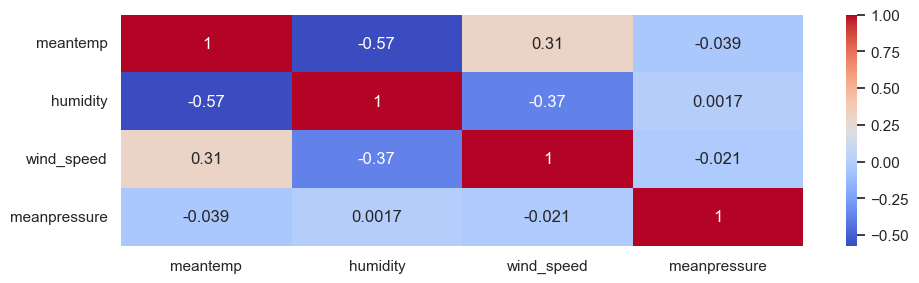

In [18]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

### Distribution of Whole dataset

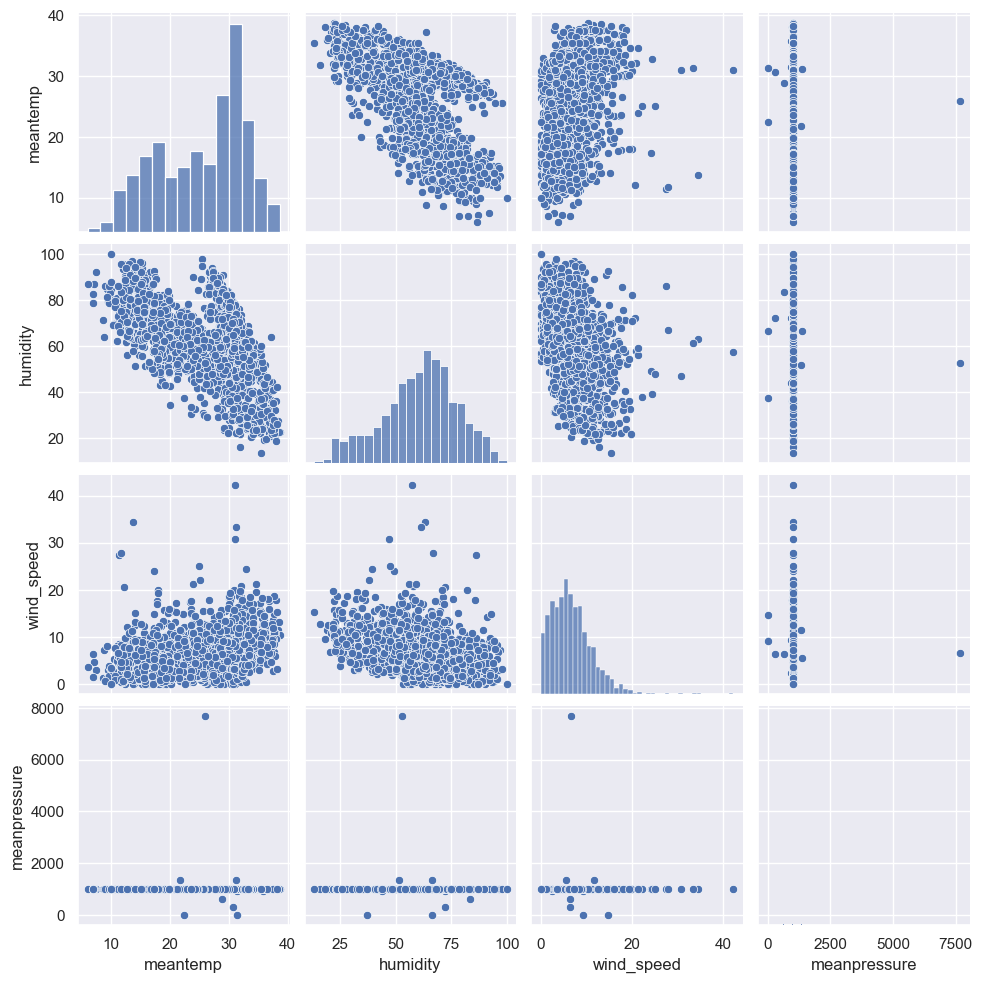

In [19]:
sns.pairplot(df)

### Data Scaling

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns, index=df.index) 
df_scaled.describe()

,meantemp,humidity,wind_speed,meanpressure
count,1.462000e+03,1.462000e+03,1.462000e+03,1.462000e+03
mean,-1.458022e-17,1.968330e-16,-1.944029e-16,-5.880689e-16
std,1.000342e+00,1.000342e+00,1.000342e+00,1.000342e+00
min,-2.654044e+00,-2.824109e+00,-1.491699e+00,-5.628829e+00
25%,-9.037230e-01,-6.201833e-01,-7.296443e-01,-5.286224e-02
50%,3.020541e-01,1.105528e-01,-1.273107e-01,-1.410365e-02
75%,7.909894e-01,6.828386e-01,5.342114e-01,2.131517e-02
max,1.799551e+00,2.340044e+00,7.766988e+00,3.701076e+01


<Axes: >

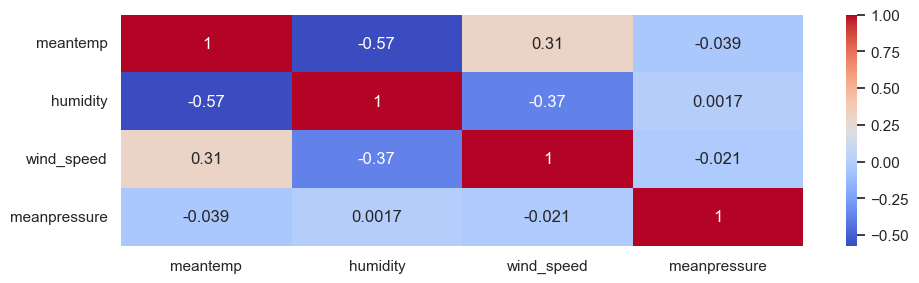

In [21]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

In [22]:
fig = px.line(df_scaled)
fig.show()

## Data Cleaning

### Removing Outliers

In [23]:
fig = px.line(df, y='meanpressure')
fig.show()

In [24]:
df.loc['2016-03-28','meanpressure'] = np.nan
df['meanpressure'] = df['meanpressure'].interpolate(method='time')
df.loc['2016-03-28']

meantemp          25.933333
humidity          52.800000
wind_speed         6.546667
meanpressure    1012.062500
Name: 2016-03-28 00:00:00, dtype: float64

In [25]:
fig = px.line(df, y='meanpressure')
fig.show()

In [26]:
fig = px.line(df)
fig.show()

### Add two more columns for a better understanding

In [27]:
df_scaled['month'] = df_scaled.index.month
df_scaled['year'] = df_scaled.index.year
df_scaled.head()

,meantemp,humidity,wind_speed,meanpressure,month,year
date,,,,,,
2013-01-01,-2.109500,1.415439,-1.491699,0.025321,1,2013
2013-01-02,-2.463454,1.862828,-0.838196,0.037162,1,2013
2013-01-03,-2.495219,1.564569,-0.475626,0.041972,1,2013
2013-01-04,-2.291015,0.630022,-1.221233,0.033647,1,2013
2013-01-05,-2.654044,1.554627,-0.680303,0.029946,1,2013


In [28]:
df_scaled.month.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [29]:
df_scaled.year.unique()

array([2013, 2014, 2015, 2016, 2017])

<Axes: xlabel='month', ylabel='meantemp'>

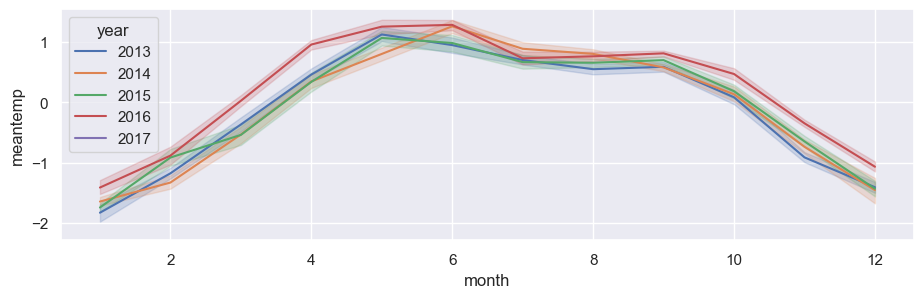

In [30]:
sns.lineplot(data=df_scaled, x='month', y='meantemp', hue='year', palette='deep' )

In [31]:
fig = px.line(df_scaled, x=df_scaled.index, y='meantemp', color='year', title='Mean Temprature by Month')
fig.show()

## Apply Prophet Model

In [32]:
df = pd.read_csv('C:\\Users\\Faizan\\OneDrive\\Desktop\\Faizan Folder\\Excel Data\\Time Series Dataset\\DailyDelhiClimateTrain.csv')

In [33]:
df.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


### Change Feature and labels name

In [34]:
df = df.rename(columns={'date': 'ds', 'meantemp': 'y'})
df.head()

,ds,y,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


### Model Fitting

In [35]:
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly

model = Prophet()
model.fit(df)


13:47:29 - cmdstanpy - INFO - Chain [1] start processing
13:47:30 - cmdstanpy - INFO - Chain [1] done processing


In [36]:
forecast = model.make_future_dataframe(periods = 365)
forecast = model.predict(forecast)

#### Plotting the Predictons

In [37]:
plot_plotly(model, forecast)

In [38]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-01-01,24.689997,9.026374,14.135223,24.689997,24.689997,-12.939197,-12.939197,-12.939197,0.034058,0.034058,0.034058,-12.973255,-12.973255,-12.973255,0.0,0.0,0.0,11.750800
1,2013-01-02,24.690142,9.431838,14.585964,24.690142,24.690142,-12.803590,-12.803590,-12.803590,0.146275,0.146275,0.146275,-12.949865,-12.949865,-12.949865,0.0,0.0,0.0,11.886552
2,2013-01-03,24.690287,9.519926,14.387781,24.690287,24.690287,-12.844073,-12.844073,-12.844073,0.067163,0.067163,0.067163,-12.911235,-12.911235,-12.911235,0.0,0.0,0.0,11.846214
3,2013-01-04,24.690432,9.151298,14.453813,24.690432,24.690432,-12.831776,-12.831776,-12.831776,0.027535,0.027535,0.027535,-12.859310,-12.859310,-12.859310,0.0,0.0,0.0,11.858656
4,2013-01-05,24.690577,9.107857,14.561653,24.690577,24.690577,-12.865204,-12.865204,-12.865204,-0.069124,-0.069124,-0.069124,-12.796081,-12.796081,-12.796081,0.0,0.0,0.0,11.825373


### Error Calculations

In [39]:
from sklearn.metrics import mean_squared_error

true_values = [11.825373, 11.750800]  

# Extract the predicted values from the forecast for the future dates
predicted_values = forecast['yhat'].tail(2).values

# Calculate mean squared error
mse = mean_squared_error(true_values, predicted_values)
# Calculate root mean squared error
rmse = np.sqrt(mse)
# Calculate the mean of the true values
mean_true_values = np.mean(true_values)
# Express RMSE as a percentage of the mean of the true values
percentage_error = (rmse / mean_true_values) * 100

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'RMSE as Percentage of Mean True Values: {percentage_error:.2f}%')

Mean Squared Error: 13.896377453943487
Root Mean Squared Error: 3.727784523539885
RMSE as Percentage of Mean True Values: 31.62%
